# 3115-Lab Programming Machine Learning

## Lab Exercise 6

## Yuvaraj Prem Kumar, 303384

In [644]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [645]:
#The following sklearn libraries are imported for use in Question 2 and 3
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [646]:
# Filter out these warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Part 1. Dataset Pre-processing

**Dataset 1: D1**

Here we generate the D1 using Uniform Distribution, matrix X $\in R^{100x1}$ with given mean, $\mu$ = 1 and standard deviation, $\sigma$ = 0.05, and matrix Y using the given equation: $y = 1.3x^2+4.8^x+8+\psi$ ; where $\psi\in R^{100x1}$

The generation code given in scipy built-in random normal [1]. Now we need to calculate the 'low' and 'high' bounds based on the probabilty density function [2]: $P_{f(x)}= \frac{1}{B-A}$; where mean, $\mu = \frac{(A+B)}{2}$ and $\sigma =  \sqrt{\frac{(B-A)^2}{12}}$

In [647]:
np.random.seed(10)  # Just for debugging purposes to ensure same sequence generated. Can be removed.

mu, sigma = 1, 0.05
B = (np.sqrt(12)*sigma/2) + mu
A = 2*mu - B

X = np.random.uniform(A, B, 100)
print('Sample values of X:', X[:5])

Y = 1.3*(X**2) + 4.8*X + 8 + np.random.random(100)
print('Sample values of Y:', Y[:5])

D1 = pd.DataFrame({'X': X, 'Y': Y})
D1 = D1.sort_values(by=['X'])  # For better plotting later
print('D1 Dataframe:')
D1.head(5)

Sample values of X: [1.04699411 0.9169918  1.02314855 1.0430941  0.99974141]
Sample values of Y: [15.02876385 14.34863056 14.34009318 14.88584135 14.88003562]
D1 Dataframe:


,X,Y
12,0.914081,14.147265
1,0.916992,14.348631
85,0.917797,14.243156
64,0.920201,14.262632
70,0.920319,14.301326


**Dataset 2: D2**

We are reusing the wine quality dataset from previous labs. Hence I copy my previous code exactly, and leave out the rationale behind each pre-processing steps as they have already been covered extensively. The block below contains the various helper functions used in each pre-processing step.

However as in [3], there is one additional point - previously we would manually add a columns of "ones" for the bias / intercept. But since sklearn's default setting for "fit_intercept = True" will handle the intercept (coefficients), we can leave this part out for Part 2. In Part 4 since we are not using sklearn, this bias column will be added manually later.

In [648]:
# Function for missing or NA values, adapted from my previous labs
def checknull(dataframe):
    i = dataframe.isnull().sum().sum()
    if i == 0:
        print('No NaN values in dataset')
    else:
        print('NaN values found:', i)
        

# Column-wise normalization, adapted from [3]
def normalize(x):
    '''We should just normalize the "X" aka observations'''
    return (x-np.min(x))/(np.max(x)-np.min(x))


# Insert column of "ones" to first index column, "try" helps with reruns
def add_bias(dfx):
    if 'bias' not in dfx.columns:
        return dfx.insert(0, "bias", 1) 
    else:
        return print("Bias column already exists")
        
        
# Train / test split of 80% / 20%, code from my previous labs
def train_test_split(dfx, dfy):
    mask = np.random.rand(len(dfx)) < 0.8
    x_train, y_train = dfx[mask], dfy[mask]
    x_test, y_test = dfx[~mask], dfy[~mask]
    
    x_train = x_train.to_numpy()  # Unpack dataframe to numpy arrays
    y_train = y_train.to_numpy().reshape(-1, 1)
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy().reshape(-1, 1)
    
    
    print('\nShape of x_train:', x_train.shape, ';', 'Shape of y_train:', y_train.shape)
    print('\nShape of x_test:', x_test.shape, ';', 'Shape of y_test:', y_test.shape)
    
    return x_train, y_train, x_test, y_test

In [742]:
def wine_preprocessing(wine_csv, title, target, addbias = 'False'):
    df = pd.read_csv(wine_csv, sep = ';')
    print(title, df.shape[0], "rows X", df.shape[1], "columns")
    checknull(df)
  
    x_df = df.drop([target], axis=1)
    x_df = x_df.apply(lambda x: normalize(x), axis=0) # Calling the normalize function
    #df = df.apply(lambda x: normalize(x), axis=0)
    y_df = df[target]
    if addbias == 'True':
        add_bias(x_df)
        
    print("\nSample X Data:")
    print(x_df.head(3))
    print("\nSample Y Data:")
    print(y_df.head(3))
    x_train, y_train, x_test, y_test = train_test_split(x_df, y_df)
    return df,x_train, y_train, x_test, y_test

In [778]:
# Red wine dataset
df2,xtrain_d2, ytrain_d2, xtest_d2, ytest_d2 = wine_preprocessing('winequality-red.csv', 'Red Wine Dataset:', 'quality')

Red Wine Dataset: 1599 rows X 12 columns
No NaN values in dataset

Sample X Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  

Sample Y Data:
0    5
1    5
2    5
Name: quality, dtype: int64

Shape of x_train: (1287, 11) ; Shape of y_train: (1287, 1)

Shape of x_test: (312, 11) ; Shape of y_test: (312, 1)


## Part 2: Generalized Linear Models with Scikit Learn

Here we are using several sklearn libraries to implement linear regression, based on the following approaches:

1. Ordinary Least Squares (OLS)
2. Ridge Regression 
3. LASSO (least absolute shrinkage and selection operator)

Ridge regression is basically regression with added L2 regularization, and LASSO is regression with added L1 regularization.
We are using D2 - Red Wine dataset here. For each model, we have the following steps:

1. Learn with three sets of hyperparameters (learning rate, regularization constant, etc)
2. Measure and plot Train & Test RMSE
3. Discussion of results with regards to underfitting and overfitting
4. Introduce grid search cross-validation for each model
5. Evaluate the model using the optimal hyperparameters via cross_val_score, and boxplot

In [671]:
# Function for calculating RMSE 
def rmse_calc(y_true, y_pred):
    rmse_val = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 5)
    return rmse_val

# Plotting functions
def model_plot(learning_rate, train_rmse, test_rmse, title):
    x_length = range(len(learning_rate))
    plt.scatter(x_length, train_rmse, label='Train RMSE')
    plt.scatter(x_length, test_rmse, label='Test RMSE')
    plt.xticks(x_length, learning_rate)
    plt.title(title)
    plt.xlabel("Learning Rate")
    plt.ylabel("RMSE value")
    plt.legend()
    plt.show()
    
def model3d_plot(x, y, z, z2, title):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    fig.add_axes([0,0,1,1]).axis("off")
    ax.scatter(x, y, z, zdir='z', label='Train')
    ax.scatter(x, y, z2, zdir='z', label='Test')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Learning Rate, α')
    ax.set_ylabel('Reg. constant, λ')
    ax.set_zlabel('RMSE value')
    ax.legend(loc='best')
    #fig.show()

**A. Ordinary Least Squares (OLS)**

In [672]:
def OLS_model(xtrain, ytrain, xtest, ytest, alpha):
    
    """Function for ordinary least squares, using SGDRegressor [4]
    
    Linear model fitted by minimizing a regularized empirical loss with SGD
    Params:
    loss - default(squared loss)
    penalty - none for OLS
    learning_rate - constant, use values of eta0
    eta0 - learning rate
    fit_intercept - default (true)
    
    Output train rmse, test rmse
    
    """
    ols = SGDRegressor(learning_rate = 'constant', eta0 = alpha, penalty = 'none', max_iter=1000, tol=-np.infty)
    
    ols.fit(xtrain, ytrain.ravel())
    yhat_train = ols.predict(xtrain)
    yhat_test = ols.predict(xtest)
    
    rmse_train = rmse_calc(ytrain, yhat_train)
    rmse_test = rmse_calc(ytest, yhat_test)
    
    print("For learning rate of", alpha, ": Train RMSE = ", rmse_train, "and Test RMSE =", rmse_test)
   
    return rmse_train, rmse_test

For learning rate of 0.01 : Train RMSE =  0.65849 and Test RMSE = 0.61896
For learning rate of 0.0001 : Train RMSE =  0.67535 and Test RMSE = 0.62512
For learning rate of 1e-05 : Train RMSE =  0.77808 and Test RMSE = 0.72744


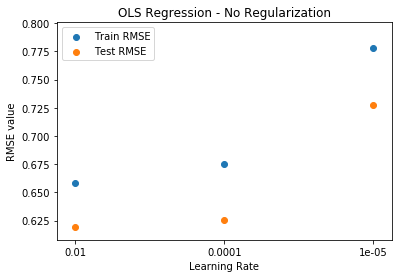

In [673]:
alpha = [0.01, 0.0001, 0.00001]
ols_train_rmse_hist, ols_test_rmse_hist = [], []

for a in alpha:
    rmse_train, rmse_test = OLS_model(xtrain_d2, ytrain_d2, xtest_d2, ytest_d2, a)
    ols_train_rmse_hist.append(rmse_train)
    ols_test_rmse_hist.append(rmse_test)

model_plot(alpha, ols_train_rmse_hist, ols_test_rmse_hist, "OLS Regression - No Regularization")

OLS regression here is without any regularization or penalty on beta. We can see that the RMSE from training data is actually higher than from testing data. A higher learning rate of 0.01 gives the lowest RMSE, after running for 1000 iteration. A learning rate of 1e-5 is too small, and the RMSE decreases very slowly.

**B. Ridge Regression**

In [674]:
def RR_model(xtrain, ytrain, xtest, ytest, alpha, lambd):
    
    """Function for ridge regression, using SGDRegressor [4]
    
    Linear model fitted by minimizing a regularized empirical loss with SGD
    Params:
    loss - default(squared loss)
    penalty - L2
    learning_rate - constant, use values of eta0
    eta0 - learning rate
    fit_intercept - default (true)
    lamba =  range of regularization constant
    
    Output train rmse, test rmse
    
    """
    rr = SGDRegressor(learning_rate = 'constant', alpha = lambd, eta0 = alpha, penalty = 'l2', max_iter=1000, tol=-np.infty)
    
    rr.fit(xtrain, ytrain.ravel())
    yhat_train = rr.predict(xtrain)
    yhat_test = rr.predict(xtest)
    
    rmse_train = rmse_calc(ytrain, yhat_train)
    rmse_test = rmse_calc(ytest, yhat_test)
    
    #print("\nFor learning rate", alpha, "and λ=", lambd, "; Train RMSE = ", rmse_train, "; Test RMSE =", rmse_test)

    return rmse_train, rmse_test

In [675]:
alpha = [0.01, 0.0001, 0.00001]
lambd = [0.00001, 0.001, 1]
rr_train_rmse_hist, rr_test_rmse_hist = [], []
a_arr, l_arr = [], [] 
for a in alpha:
    for l in lambd:
        a_arr.append(a)
        l_arr.append(l)
        rmse_train, rmse_test = RR_model(xtrain_d2, ytrain_d2, xtest_d2, ytest_d2, a, l)
        rr_train_rmse_hist.append(rmse_train)
        rr_test_rmse_hist.append(rmse_test)

We can store the results in a table for easier comparison

In [676]:
RR_DF = pd.DataFrame(np.column_stack((a_arr,l_arr, rr_train_rmse_hist, rr_test_rmse_hist)), 
                      columns = ['Learning Rate', 'Regularization Constant',  'Train RMSE', 'Test RMSE'])

RR_DF

,Learning Rate,Regularization Constant,Train RMSE,Test RMSE
0,0.01000,0.00001,0.65849,0.61298
1,0.01000,0.00100,0.65734,0.61778
2,0.01000,1.00000,0.81907,0.77734
3,0.00010,0.00001,0.67533,0.62516
4,0.00010,0.00100,0.67434,0.62505
5,0.00010,1.00000,0.80649,0.75925
6,0.00001,0.00001,0.77808,0.72744
7,0.00001,0.00100,0.77776,0.72728
8,0.00001,1.00000,0.80636,0.75954


Since the learning rates and regularization constant have a large difference, we use logarithmic scale to shorten the distance in the set for better visualization [5].

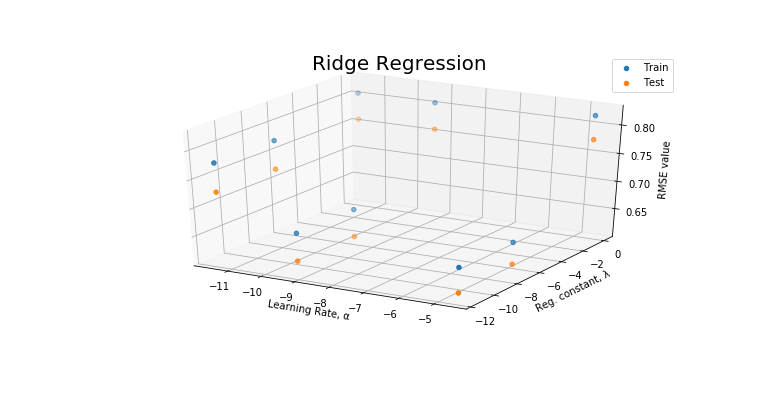

In [677]:
model3d_plot(np.log(a_arr), np.log(l_arr), rr_train_rmse_hist, rr_test_rmse_hist, 'Ridge Regression')

We know from previous that a learning rate of 0.01 gives the best results. When regularization constant, $\lambda$ is really high i.e. 1, the RMSE is highest for all learning rates. A high regularization constant will lead to a more general/underfit model. However the main thing as seen in Lab 5, the overriding factor is still the learning rate, and this accounts the low spread in values for RMSE, regardless of the $\lambda$ used anyway.

**C. LASSO**

The function is similar as in part B, anyway here we just change the penalty in SGDregressor to the L1 regularization.

In [679]:
def LASSO_model(xtrain, ytrain, xtest, ytest, alpha, lambd):
    
    """Function for LASSO, using SGDRegressor [4]
    
    Linear model fitted by minimizing a regularized empirical loss with SGD
    Params:
    loss - default(squared loss)
    penalty - L2
    learning_rate - constant, use values of eta0
    eta0 - learning rate
    fit_intercept - default (true)
    lamba =  range of regularization constant
    
    Output train rmse, test rmse
    
    """
    lasso = SGDRegressor(learning_rate = 'constant', alpha = lambd, eta0 = alpha, penalty = 'l1', max_iter=500, tol=-np.infty)
    
    lasso.fit(xtrain, ytrain.ravel())
    yhat_train = lasso.predict(xtrain)
    yhat_test = lasso.predict(xtest)
    
    rmse_train = rmse_calc(ytrain, yhat_train)
    rmse_test = rmse_calc(ytest, yhat_test)
    
    #print("\nFor learning rate", alpha, "and λ=", lambd, "; Train RMSE = ", rmse_train, "; Test RMSE =", rmse_test)

    return rmse_train, rmse_test

In [680]:
alpha = [0.01, 0.0001, 0.00001]
lambd = [0.00001, 0.001, 1]
lasso_train_rmse_hist, lasso_test_rmse_hist = [], []
a_arr, l_arr = [], [] 
for a in alpha:
    for l in lambd:
        a_arr.append(a)
        l_arr.append(l)
        rmse_train, rmse_test = LASSO_model(xtrain_d2, ytrain_d2, xtest_d2, ytest_d2, a, l)
        lasso_train_rmse_hist.append(rmse_train)
        lasso_test_rmse_hist.append(rmse_test)

In [681]:
LASSO_DF = pd.DataFrame(np.column_stack((a_arr,l_arr, lasso_train_rmse_hist, lasso_test_rmse_hist)), 
                      columns = ['Learning Rate', 'Regularization Constant',  'Train RMSE', 'Test RMSE'])

LASSO_DF

,Learning Rate,Regularization Constant,Train RMSE,Test RMSE
0,0.01000,0.00001,0.65440,0.61109
1,0.01000,0.00100,0.65869,0.61848
2,0.01000,1.00000,0.81647,0.76852
3,0.00010,0.00001,0.69759,0.64494
4,0.00010,0.00100,0.69755,0.64518
5,0.00010,1.00000,0.81647,0.76851
6,0.00001,0.00001,0.81323,0.76389
7,0.00001,0.00100,0.81275,0.76340
8,0.00001,1.00000,0.81657,0.76912


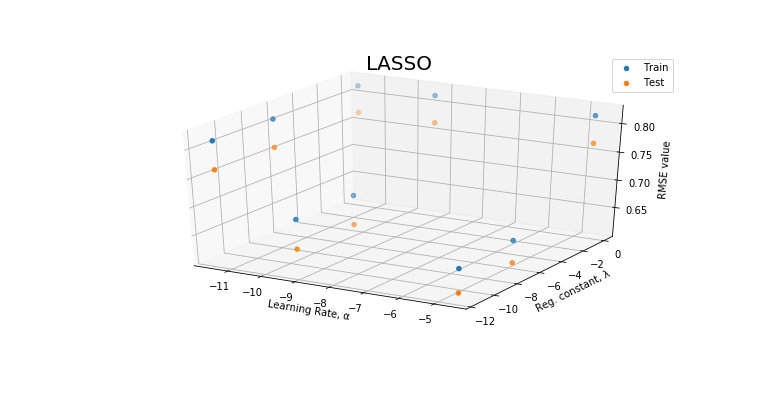

In [682]:
model3d_plot(np.log(a_arr), np.log(l_arr), lasso_train_rmse_hist, lasso_test_rmse_hist, 'LASSO')

The effects of regularization are more obvious here. Using the same $\lambda$  will make the LASSO model more sensitive than ridge regression. One way to explain this is because the $\beta$ are between 0 and 1, and L2 regression takes the sum of squares - leading to an overall smaller regularization term. Lasso regression penalizes the total loss function with absolute value of coefficients multiplied with a constant. Therefore, the RMSE values increased for both test and train data for each
learning rate and penalty values compared to that of OLS.

Overall, we can see that the OLS model with learning rate of 0.01 gives the best average RMSE of on the test set. However, Ridge regression with the same learning rate and regularization constant of 0.00001 gives a better RMSE. Since the Train & Test RMSE values are comparable, we can say that the models are not overfitted. 

**D. Hyperparameter tuning with Grid Search**

In the previous section I provide a range of learning rate and regularization constant to the various linear models. Now we can tune those hyperparameters, using sklearn GridSearchCV. As outlined in [6], grid search consists of:
* an estimator (regressor in this case)
* a parameter space
* a method for searching or sampling candidates
* a cross-validation scheme
* a score function

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. We will use cv.results to see the cross-validation output, which is returned as a dict. The code is adapted from [7].

In [683]:
# Adapted from [8]
def grid_plot(model, alpha, lambd, title):
    scores = model.cv_results_['mean_train_score']
    scores = np.round(np.array(scores).reshape(len(lambd), len(alpha)), 5)
    scores = scores.T
    plt.figure(figsize=(8, 5))  
    for ind, i in enumerate(alpha):
        plt.plot(lambd, scores[ind], label='α: ' + str(i))
    plt.legend()
    plt.xlabel('Reg. constant, λ')
    plt.ylabel('Mean Score')
    plt.title(title)
    plt.show()

In [684]:
param_alpha = [0.005, 0.001, 0.05, 0.1, 0.2]
param_lambda = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
parameters = {'eta0':param_alpha,
              'alpha':param_lambda
             }

In [781]:
def glm_gridsearch(model, penalty, eta, alpha, param_alpha, param_lambda, title):
    estimator = SGDRegressor(learning_rate='constant', alpha = alpha, eta0 = eta, 
                             penalty = penalty, max_iter = 1000, tol = -np.infty)
    model = GridSearchCV(estimator, parameters, cv = 5)  # 5 folds
    model.fit(xtrain_d2, ytrain_d2.ravel())
    grid_plot(model, param_alpha, param_lambda, title)
    print("Optimum hyperparameter combination:", model.best_params_)
    print("Best mean score:", model.best_score_)


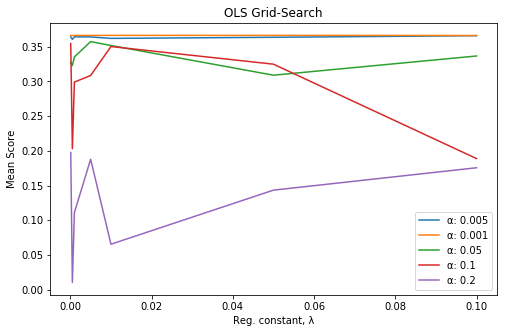

Optimum hyperparameter combination: {'alpha': 0.1, 'eta0': 0.001}
Best mean score: 0.29131551530196553


In [782]:
# OLS
glm_gridsearch('OLS', 'none', a, 0, param_alpha, param_lambda, "OLS Grid-Search")

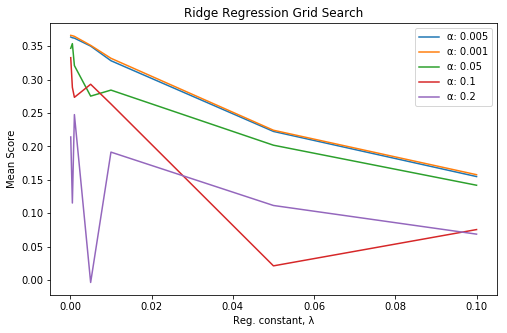

Optimum hyperparameter combination: {'alpha': 0.001, 'eta0': 0.001}
Best mean score: 0.29561542866224755


In [785]:
# Ridge regression
glm_gridsearch('RR', 'l2', a, l, param_alpha, param_lambda, "Ridge Regression Grid Search")

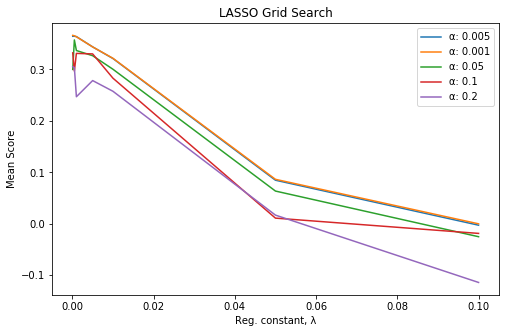

Optimum hyperparameter combination: {'alpha': 0.001, 'eta0': 0.005}
Best mean score: 0.2907535982422937


In [786]:
# LASSO
glm_gridsearch('LASSO', 'l1', a, l, param_alpha, param_lambda, "LASSO Grid Search")

Based on the above plots, we can identify the following hyperparameters as the optimum:

**OLS:** $\eta$ = 0.001 <br>
**Ridge:** $\eta$ = 0.001, $\alpha$ = 0.001 <br>
**LASSO:** $\eta$ = 0.001, $\alpha$ = 0.005 <br>

Then we can use *sklearn.cross_val_score* to compute the MSE respectively, using the scoring function.

In [791]:
# OLS
estimator = SGDRegressor(penalty = 'none', learning_rate='constant', eta0 = 0.001, max_iter=1000, tol=-np.infty)
scores = cross_val_score(estimator, xtrain_d2, ytrain_d2.ravel(), scoring = 'neg_mean_squared_error', cv = 5)
scores_df = pd.DataFrame({'OLS': np.round(np.sqrt(-scores), 5)})

# Ridge
estimator = SGDRegressor(penalty='l2', alpha = 0.001,eta0=0.001, learning_rate = 'constant', max_iter=1000, tol=-np.infty)
scores = cross_val_score(estimator, xtrain_d2, ytrain_d2.ravel(), scoring='neg_mean_squared_error', cv=5)
scores_df["Ridge"] = np.round(np.sqrt(-scores), 5)

# LASSO
estimator = SGDRegressor(penalty='l1', alpha = 0.001, eta0=0.005,learning_rate='constant', max_iter=1000, tol=-np.infty)
scores = cross_val_score(estimator, xtrain_d2, ytrain_d2.ravel(), scoring='neg_mean_squared_error', cv=5)
scores_df["LASSO"] = np.round(np.sqrt(-scores), 5)

print('Dataframe of RMSE value for 5-fold Cross Validation')
scores_df

Dataframe of RMSE value for 5-fold Cross Validation


,OLS,Ridge,LASSO
0,0.67196,0.66410,0.66916
1,0.67354,0.67173,0.67165
2,0.66541,0.66341,0.66296
3,0.66061,0.66374,0.65916
4,0.66807,0.67235,0.66906


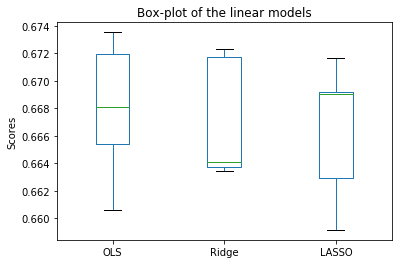

In [793]:
ax = scores_df.plot.box()
ax.set_title("Box-plot of the linear models")
ax.set_ylabel("Scores")
plt.show()

* For OLS, the boxplot has a longer tail, indicating a large spread in RMSE scores.
* Based on the results, Ridge Regression, L2 regularization seems to have the best model as it has the smallest spread in RMSE, and all the values are concentrated around the median.
* However, the $\lambda$ values were given by me, so perhaps using a larger spread could enable us to better find the best combination of hyperparameters.
* Overall, due to the simple model the RMSE values are very small and easily converge in few iterations.

## Part 3: Polynomial Regression

### Task A: Prediction with high degree of polynomials

Here, we use sklearn.preprocessing library related to polynomial features, adapted from [9] and [10]. Basically this function will generate a new feature matrix, consisting of all polynomial combinations of the features with the specified. We use multiple degrees of {1, 2, 7, 10, 16, 100}. For the linear model, we are using sklearn's Linear Regression module.

For each degree, the RMSE is calculated. Then all the fitted lines for predicted $\hat{y}$ will be plotted on the same graph, against the observations (actual datapoints). Based on this lines and RMSE, we can give a reasonable inference if the model is underfitting or overfitting. 

In [491]:
def polymodel(degree, df):
    """ Polynomial model function
    
    Input: Specified degree, dataframe
    
    Generate new feature matrix, apply linear regression to get predicted yhat. 
    Return: The plot of fitted line against features, RMSE
    
    """
    
    X = df.X.values
    X = X.reshape(-1, 1)

    y = df.Y.values
    y = Y.reshape(-1, 1)
 
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    
    y_hat = lin_reg.predict(X_poly)

    rmse = np.sqrt(mean_squared_error(y, y_hat))
    print("For degree", degree, "---> RMSE: {}".format(rmse))
      
    ax1.plot(X, y_hat) # Append plot of fitted line to scatter plot
    
    return rmse


For degree 1 ---> RMSE: 0.42961671139205676
For degree 2 ---> RMSE: 0.42876908064148883
For degree 7 ---> RMSE: 0.4254353243937931
For degree 10 ---> RMSE: 0.4138357589745719
For degree 16 ---> RMSE: 0.41127317360146537
For degree 100 ---> RMSE: 0.4056625390401291


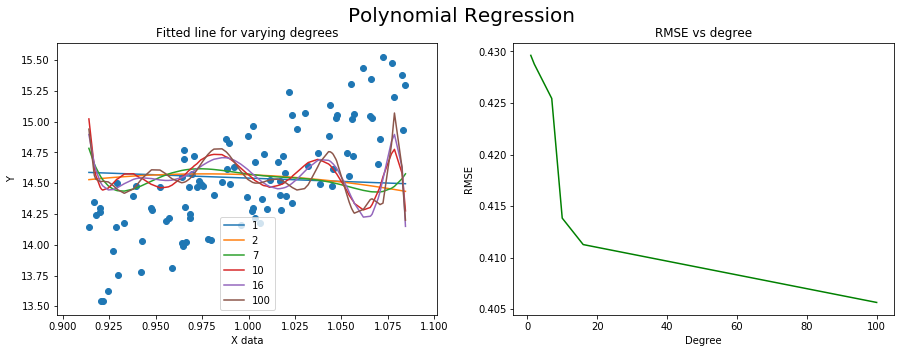

In [492]:
degree = [1, 2, 7, 10, 16, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Polynomial Regression', fontsize=20)

ax1.scatter(D1.X, D1.Y) # Initialize figure with the scatter plot first
ax1.set_title('Fitted line for varying degrees')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y')

rmse_hist = []

for i in degree:
    rmse = polymodel(i, D1)
    rmse_hist.append(rmse)
    ax1.legend(degree)
    
ax2.plot(degree, rmse_hist, color='green')
ax2.set_title('RMSE vs degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('RMSE')    
    

plt.show()

As observed, the model is prone to overfitting. For degree = 1, its a straight line. As the degree increases, the model starts to overfit. For degree >= 2, the line starts to curve as it attempts to fit more points (overfitting). However, we can see that the RMSE value decreases as the polynomial degree increases. 

Continously increasing and using a higher degree leads to a "curse of dimensionality", which basically means that when the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially [11]. One way to overcome this effect is to introduce *regularization* to penalize some of the weights. 

### Task B: Effect of Regularization

Here, we use sklearn's SGD regressor [12] to implement Ridge Regression (L2 Loss + L2 Regularization). The polynomial degree is fixed to 10. We use four different values of the regularization constant $\lambda$ to learn Polynomial Ridge Regression. 

In [113]:
def polymodel_ridge(degree, df, lambd):
    """ Polynomial model with ridge regression function
    
    Input: Specified degree, dataframe, specified lambda
    
    Generate new feature matrix, apply ridge regression to get predicted yhat. The regressors X 
    will be normalized before regression by subtracting the mean and dividing by the L2-Norm
    
    Return: The plot of fitted line against features, RMSE
    
    """
    X = df.X.values
    X = X.reshape(-1, 1)

    y = df.Y.values
    y = Y.reshape(-1, 1)
    
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X)
    
    # Learning ridge regression
    ridge_reg = Ridge(alpha = lambd, normalize=True)  # Here alpha is actually our lambda
    ridge_reg.fit(x_poly, y)
    y_hat = ridge_reg.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    print("For lambda", lambd, "---> RMSE: {}".format(rmse))
    
    ax1.plot(X, y_hat) # Append plot of fitted line to scatter plot
    
    return rmse


For lambda 0 ---> RMSE: 0.2641842997395308
For lambda 1e-06 ---> RMSE: 0.2695799807921411
For lambda 0.01 ---> RMSE: 0.27040420547663374
For lambda 1 ---> RMSE: 0.27221359032852316


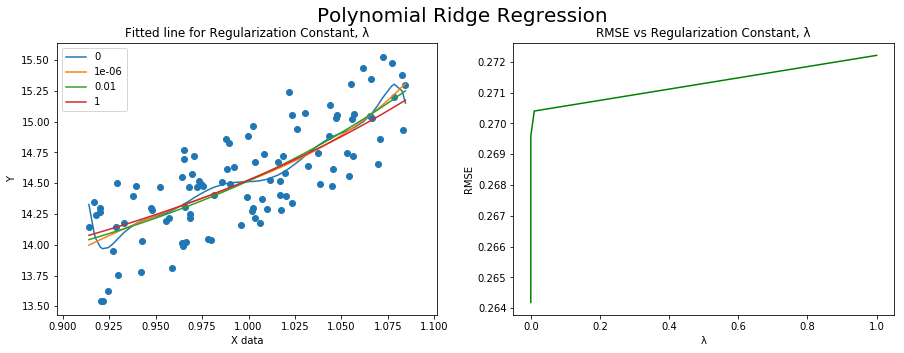

In [118]:
degree = 10
lambd = [0, 1e-6, 1e-2, 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Polynomial Ridge Regression', fontsize=20)

ax1.scatter(D1.X, D1.Y) # Initialize figure with the scatter plot first
ax1.set_title('Fitted line for Regularization Constant, λ')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y')

rmse_hist = []

for i in lambd:
    rmse = polymodel_ridge(degree, D1, i)
    rmse_hist.append(rmse)
    ax1.legend(lambd)
    
ax2.plot(lambd, rmse_hist, color='green')
ax2.set_title('RMSE vs Regularization Constant, λ')
ax2.set_xlabel('λ')
ax2.set_ylabel('RMSE')    
    
plt.show()

When $\lambda$ = 0, the model just becomes normal linear regression, so we would obtain the same RMSE and same $\beta$ coefficients. Besides this, the model is overfitted. When $\lambda$ = 1, its almost a straight line but it appears to be underfitted. A better model representation is obtained when $\lambda$ is between {1e-6, 1e-2}. For all cases, the RMSE vales are extremely close. Although the model results are almost similar for the other 3 cases, we can see that the regularized models perform slightly better compared to the unregularized model.

## Part 4: Coordinate Descent

Coordinate Descent is another type of optimization algorithm - mainly for strongly convex function minimizations and also popular for Lasso Regression. We minimize one coordinate of the $\beta$ vector one at a time while keeping the others fixed [13]. If we visualize the contour plot of the Coordinate Descent, we can see the stair-case path since we are only updating one coordinate at a time. There is no learning rate hyperparameter to tune here.

**Task A: Coordinate Descent**

The following code follows the lecture slides algorithm as below, and as adapted from [15] and [16].

<img src="https://i.imgur.com/sNrLfJI.jpg" width="45%" align="left"/>
<img src="https://i.imgur.com/pSTgQXs.jpg" width="45%" align="left"/>

In [744]:
def wine_preprocessing2(wine_csv, title, target, addbias = 'False'):
    df = pd.read_csv(wine_csv, sep = ';')
    print(title, df.shape[0], "rows X", df.shape[1], "columns")
    checknull(df)
  
    df = df.apply(lambda x: normalize(x), axis=0)
    x_df = df.drop([target], axis=1)
    y_df = df[target]
    if addbias == 'True':
        add_bias(x_df)
        
    print("\nSample X Data:")
    print(x_df.head(3))
    print("\nSample Y Data:")
    print(y_df.head(3))
    x_train, y_train, x_test, y_test = train_test_split(x_df, y_df)
    return df,x_train, y_train, x_test, y_test

In [745]:
# Dataset, we need to manually add the bias column now, as it was not necessary when using Sklearn.
df3, xtrain_d3, ytrain_d3, xtest_d3, ytest_d3 = wine_preprocessing('winequality-red.csv', 'Red Wine Dataset:', 
                                                                   'quality', 'True')
df4, xtrain_d4, ytrain_d4, xtest_d4, ytest_d4 = wine_preprocessing2('winequality-red.csv', 'Red Wine Dataset:', 
                                                                   'quality', 'True')

Red Wine Dataset: 1599 rows X 12 columns
No NaN values in dataset

Sample X Data:
   bias  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1       0.247788          0.397260         0.00        0.068493   
1     1       0.283186          0.520548         0.00        0.116438   
2     1       0.283186          0.438356         0.04        0.095890   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.106845             0.140845              0.098940  0.567548  0.606299   
1   0.143573             0.338028              0.215548  0.494126  0.362205   
2   0.133556             0.197183              0.169611  0.508811  0.409449   

   sulphates   alcohol  
0   0.137725  0.153846  
1   0.209581  0.215385  
2   0.191617  0.215385  

Sample Y Data:
0    5
1    5
2    5
Name: quality, dtype: int64

Shape of x_train: (1283, 12) ; Shape of y_train: (1283, 1)

Shape of x_test: (316, 12) ; Shape of y_test: (316, 1)
Red Wine Dataset: 1599 rows

In [727]:
def fx_beta(X,y,beta):
    """Helper function, to calculate beta function value
    """
    f = y - np.matmul(X,beta)
    fx = np.dot(f.T, f)  # F_transpose * F
    
    return fx

In [728]:
def minimize_cd(xtrain, ytrain, b, m):
    """Minimize coordinate descent, that optimizes the gradient over a single coordinate, will be called cyclically
       to optimize coordinates 0, 1, …, (k-1) in order and repeat.
    """
    x_m = np.hstack((xtrain[:, :m], xtrain[:, m+1:]))  # All columns except n-th degree column
    xm = xtrain[:, m]  # Now N-th degree column
    betas_m = np.hstack((b[:m], b[m+1:]))  # Concatenate current and previous with N-th degree
    gradient_beta = np.dot((ytrain - np.dot(x_m, betas_m)).T, xm)/ np.dot(xm.T, xm)
    
    return gradient_beta    

In [729]:
def learn_linreg_cd(X, Y, iters, espsilon):
    """Linear regression with coordinate descent function.
    
    Input: X, y, max iterations, epsilon
    Iteratively compute beta coefficient coordinates one at a time (cyclical) 
    and output the change in beta and change in function value.
    
    """
    
    M, N = X.shape
    betas_hist, fx_betas_hist = [], []
    
    # Initial function value
    beta = np.ones(N) # Initialize weights as vector of ones, using zeroes will not allow it to converge
    prev_fx_beta = fx_beta(X, Y, beta)
    fx_betas_hist.append(prev_fx_beta)

    for i in range(iters):
        prev_beta = beta
        
        for n in range (N):
            beta[n] = minimize_cd(X, Y, beta, n)
            
        betas_hist.append(list(beta))
        curr_fx_beta = fx_beta(X,Y,beta)
        fx_betas_hist.append(curr_fx_beta)
        
        if np.abs(prev_fx_beta - curr_fx_beta) < espsilon:
            plt.figure(figsize=(12, 5))
            plt.plot(betas_hist)
            plt.title("Coordinate Descent without LASSO", fontsize=20)
            plt.xlabel("Iterations")
            plt.ylabel("Coefficients")
            
            return betas_hist, fx_betas_hist
        
        prev_fx_beta = curr_fx_beta


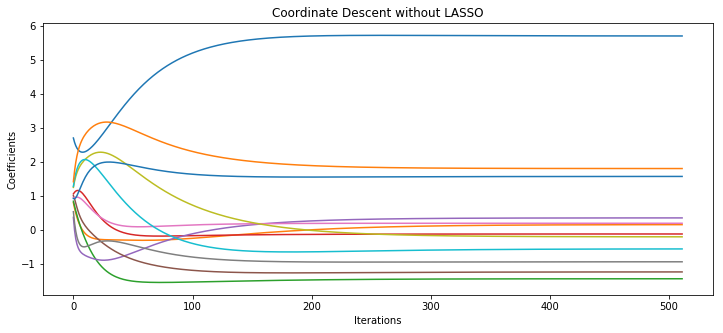

In [730]:
iters = 1000 
espsilon = 1e-6 # Stopping criterion per lecture

betas, hist = learn_linreg_cd(xtrain_d3, ytrain_d3.ravel(), iters, espsilon)

We set the max iterations to 1000, but after 500 iterations the change in function value drops below our stopping criterion of $1^{-6}$. As seen, the coefficients representing the features start to converge towards zero, but not actually reaching zero. Although we have one outlier as seen, which is the bias column as the other columns have been normalized beforehand.

**Task B: Coordinate Descent with L1 Regularization (LASSO)**

The algorithm is mostly the same as in Task A, except now we introduce L1 Regularization term. This makes the funtion non-differentiable. Hence we can apply thresholding (soft in this case).

<img src="https://i.imgur.com/ozxevxQ.jpg" width="45%"/>

In [731]:
def soft_threshold(rho,lamda):
    """Soft threshold function used for normalized data and lasso regression, 
       as from [15] forces the element update to zero
       
    """
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

In [732]:
def minimize_cd_l1(xtrain, ytrain, b, m, l):
    """Minimize coordinate descent, that optimizes the gradient over a single coordinate, will be called cyclically
       to optimize coordinates 0, 1, …, (k-1) in order and repeat. Now added L1 regularization term.
       Soft thresholding applied to gradient output.
    """
    x_m = np.hstack((xtrain[:, :m], xtrain[:, m+1:])) 
    xm = xtrain[:, m]  
    betas_m = np.hstack((b[:m], b[m+1:]))  
    gradient_beta = soft_threshold(np.dot((ytrain - np.dot(x_m, betas_m)).T, xm) / np.dot(xm.T, xm), 
                                   (0.5*l / (np.dot(xm.T, xm))))
    
    return gradient_beta    

In [794]:
def learn_linreg_l1reg_cd(X, Y, iters, espsilon):
    """Linear regression with coordinate descent function.
    
    Input: X, y, max iterations, epsilon
    Iteratively compute beta coefficient coordinates one at a time (cyclical) 
    and output the change in beta and change in function value.
    
    """
    
    M, N = X.shape
    betas_hist, fx_betas_hist = [], []
    
    # Initial function value
    beta = np.ones(N) # Initialize weights as vector of ones, using zeroes will not allow it to converge
    prev_fx_beta = fx_beta(X, Y, beta)
    fx_betas_hist.append(prev_fx_beta)

    for i in range(iters):
        prev_beta = beta
        
        for n in range (N):
            beta[n] = minimize_cd_l1(X, Y, beta, n, 0.001)
            
        betas_hist.append(list(beta))
        curr_fx_beta = fx_beta(X,Y,beta)
        fx_betas_hist.append(curr_fx_beta)
        
        if np.abs(prev_fx_beta - curr_fx_beta) < espsilon:
            plt.figure(figsize=(12, 5))
            plt.plot(betas_hist)
            plt.title("Coordinate Descent with LASSO", fontsize=20)
            plt.xlabel("Iterations")
            plt.ylabel("Coefficients")
            
            return betas_hist, fx_betas_hist
        
        prev_fx_beta = curr_fx_beta


To see the effects of L1 Regularization intially, only one value of $\lambda$ = 0.001 is used.

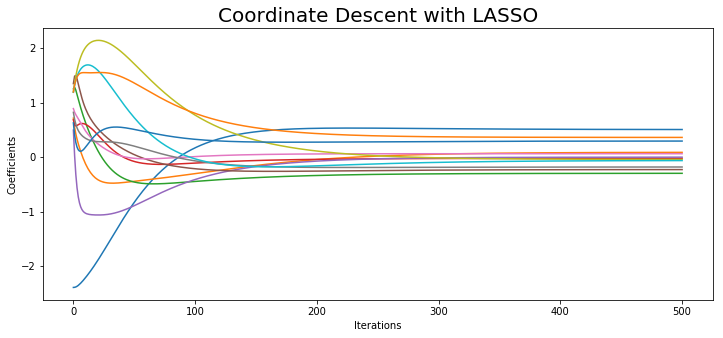

In [795]:
iters = 1000 
espsilon = 1e-6 # Stopping criterion per lecture

betas, hist = learn_linreg_l1reg_cd(xtrain_d4, ytrain_d4.ravel(), iters, espsilon)

Now we can investigate the effects of many instance of L1 Regularization constant, $\lambda$. The above code is modified to plot coefficients against $\lambda$, instead of iterations.

In [779]:
def minimize_cd_soft2(beta,X,y,lamda, iters,n):
    X = X / (np.linalg.norm(X,axis = 0))
    for i in range(iters): 
        for j in range(n):
            X_j = X[:,j].reshape(-1,1)
            y_pred = np.matmul(X, beta)
            rho = np.matmul(X_j.T , (y - y_pred  + beta[j]*X_j))
            beta[j] =  soft_threshold(rho, lamda)   
            
    return beta.flatten()

In [755]:
def learn_linreg_l1reg_cd2(xtrain, ytrain, lamda, iters):
    """ Learning linear regression with coordinate descent for multiple instances of L1 regularization constant, lambda
        
        Input: X, y, generated logspace of lambda values between 0 and 4, for 300 instances
        Output: beta coefficients history
        
    """
    m,n = xtrain.shape
    initial_theta = np.ones((n,1))
    theta_list = []

    for l in lamda:
        theta = minimize_cd_soft2(initial_theta, xtrain, ytrain, l, 100, n)
        theta_list.append(theta)
        
    return theta_list

Text(0.5, 1.0, 'Coefficients, β against log of L1 Regularization Constant, λ')

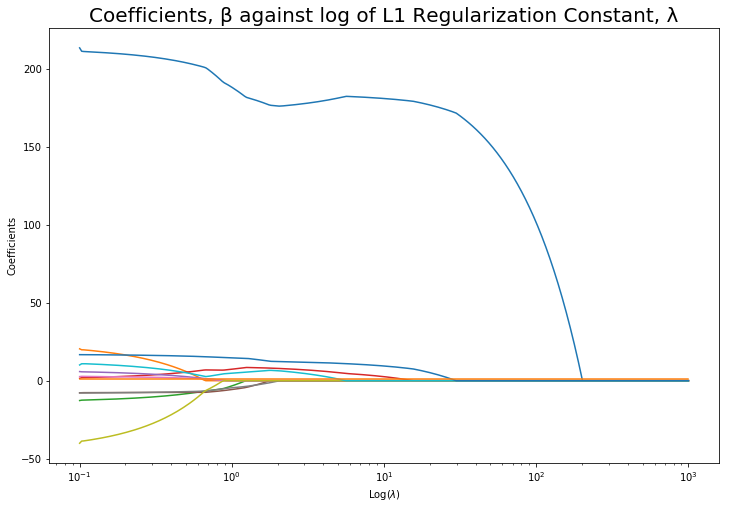

In [756]:
lamda = np.logspace(0,4,300)/10  # Range of lambda values

beta_hist = learn_linreg_l1reg_cd2(xtrain_d3, ytrain_d3, lamda, 100)

# Stack into numpy array
betas = np.stack(beta_hist).T

# Plotting results for all L1 Regularization constants
plt.figure(figsize = (12,8))
for i in range(betas.shape[0]):
    plt.plot(lamda, betas[i])
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Coefficients, β against log of L1 Regularization Constant, λ', fontsize=20)

**Task C: Comparision**

* Using normal Coordinate Descent without any LASSO regularization, it can be observed that the coefficients does converge to smaller values, but it mostly does not converge to zero value.
* With LASSO or L1 Regularization, the coefficients start to converge, this is the idea behind the soft thresholding, as the LASSO function is not differentiable anymore, so the soft threshold forces the element to zero below a certain point.
* Using multiple values of L1 Regularization constant, we can observe the effect much clearer - the values eventually drop to zero, as its being forced by the soft threshold.
* As compared to Gradient Descent, Coordinate Descent is useful for complicated functions or functions whose derivatives are more computationally expensive. Besides that, we do not have the learning rate hyperparameter to optimize.
* However if the function is not strongly convex, Coordinate Descent method may not reach the local minimum. The algorithm may get stuck at a non-stationary point [17].

## References

[1] https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html<br>
[2] https://www.itl.nist.gov/div898/handbook/eda/section3/eda3662.htm <br>
[3] https://stackoverflow.com/questions/46078104/is-it-required-to-add-columns-of-ones-to-training-data-for-multivariate-linear-r <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html <br>
[5] https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70 <br>
[6] https://scikit-learn.org/stable/modules/grid_search.html <br>
[7] https://stackoverflow.com/questions/42362027/model-help-using-scikit-learn-when-using-gridsearch/42364900#42364900 <br>
[8] https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv <br>
[9] https://stackoverflow.com/questions/51906274/cannot-understand-with-sklearns-polynomialfeatures <br>
[10] https://www.ritchieng.com/machine-learning-polynomial-regression/ <br>
[11] https://www.kdnuggets.com/2017/04/must-know-curse-dimensionality.html <br>
[12] https://github.com/robertdefilippi/ridge-regression-python/blob/master/ridge-model.ipynb <br>
[13] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html <br>
[14] http://www.adeveloperdiary.com/data-science/machine-learning/introduction-to-coordinate-descent-using-least-squares-regression/ <br>
[15] https://xavierbourretsicotte.github.io/lasso_implementation.html<br>
[16] https://stackoverflow.com/questions/51977418/coordinate-descent-in-python <br>
[17] http://users.ece.utexas.edu/~cmcaram/EE381V_2012F/Lecture_5_Scribe_Notes.final.pdf <br>